In [2]:
#pack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
#data 

from tensorflow.keras.datasets import mnist

In [3]:
#set de train / test
(X_train , y_train), (X_test , y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

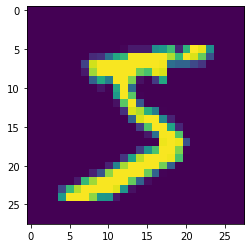

In [5]:
#affiche la 1ere image 
plt.imshow ( X_train[0] )

In [6]:
y_train[0]

# ici 5 c est une valeur continue mais c est surtout une categorie de classe 5
# c est un pb de classification 

5

In [7]:
#categoriser les targets 
from tensorflow.keras.utils import to_categorical

y_train = to_categorical ( y_train , num_classes = 10 )
y_test  = to_categorical ( y_test  , num_classes = 10 )

In [8]:
# normaliser les ensembles 

X_train = X_train / 255
X_test = X_test / 255

# les données sont comprises entre 0 et 255 

In [9]:
#reshape 

X_train_i = X_train.reshape (60000, 28, 28 ,1)
X_test_i = X_test.reshape (10000, 28, 28 ,1)

print ( X_train.shape )
print ( X_train_i.shape )

# le format est (nb image , 28pixels*28 , 1 canal de couleur) #1: noir/blanc

(60000, 28, 28)
(60000, 28, 28, 1)


In [10]:
#CNN 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D , Dropout,Flatten, MaxPool2D

# le gros du travail est le couche du convolution 
                    # et la couche de maxpool2D

model = Sequential ()

#couches :
model.add ( Conv2D ( filters = 32 , #nombre de filtre    
                     kernel_size = (4,4),   #le noyau 
                     input_shape = (28,28,1), #taille de l input
                     activation= 'relu') )  

model.add (MaxPool2D (pool_size = (2,2) ) )  #la 1/2 du noyau 

# Flatten applatit le tableau de 28*28  = 784 
# applatit le tableau en 2 dim de 28*28 est applatit en 1 tableau de 784

model.add ( Flatten () )  

model.add ( Dense (128 , activation = 'relu'))

model.add ( Dense (10 ,                      # il y a 10 classes
                   activation = 'softmax'))  # c est un pb de 
                                             # classification multi class

In [11]:
#compile
model.compile ( loss = 'categorical_crossentropy' , 
                optimizer = 'adam', 
                metrics = [ 'accuracy' ] )  #nous allons verifier les loss (pertes)
                                            # mais aussi la presicion

#     pouor voir toute ls metrics :
#    https://keras.io/api/metrics/

In [12]:
# callbacks

from tensorflow.keras.callbacks import EarlyStopping 

eas = EarlyStopping ( monitor = 'val_loss' , 
                     patience = 1)

In [13]:
# fit
model.fit (  X_train_i , 
             y_train , 
             epochs = 10 ,
             validation_data = (X_test_i , y_test) , 
             callbacks = [eas]  )

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1325 - accuracy: 0.9600 - val_loss: 0.0562 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0454 - accuracy: 0.9861 - val_loss: 0.0414 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0439 - val_accuracy: 0.9840


<AxesSubplot:>

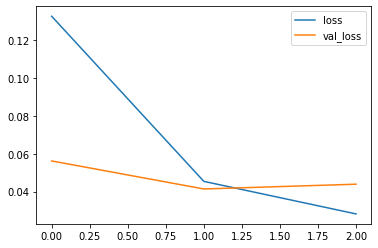

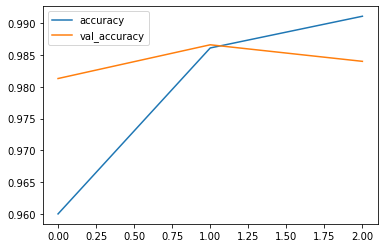

In [15]:
#courbe d apprentissage

x = pd.DataFrame(model.history.history) 
x[['loss' , 'val_loss']].plot()
x [['accuracy' , 'val_accuracy']].plot()

In [16]:
# prediction du set

predict = to_categorical (np.argmax (model.predict (X_test_i ) , axis = 1))

In [17]:
# evaluation du modele

model.evaluate(X_test_i , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0439 - accuracy: 0.9840


[0.04393601045012474, 0.984000027179718]

In [18]:
# classification_report

from sklearn.metrics import classification_report , confusion_matrix

print (classification_report (y_test , predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.96      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.96      0.99      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



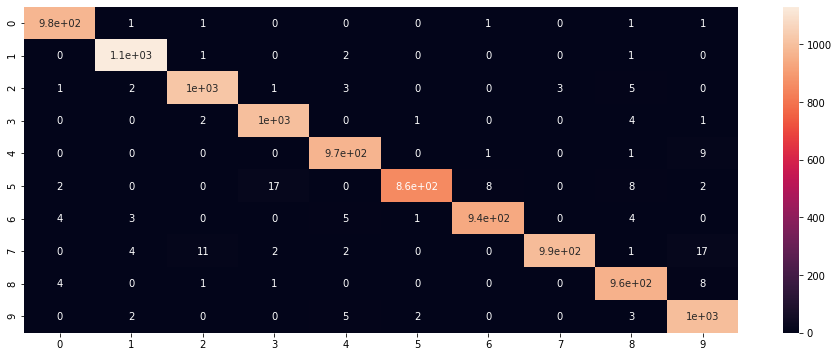

In [19]:
# confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test.argmax(axis=1), predict.argmax(axis=1)  , )

plt.figure (figsize = (16,6))
sns.heatmap ( conf , annot = True);

#a l aide de la figure : 
# le modele a d excelent resultat
# le modele confond tres legerement les 3 et les 5

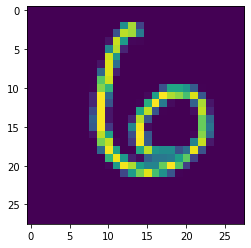

In [14]:
#prediction sur 1 element

My_image = X_test_i [100]
plt.imshow (My_image)


In [20]:
predict = np.argmax (model.predict (X_test_i[100].reshape  (1, 28,28,1) ) , axis = 1)
# X_test_i[100].reshape  (1, 28,28,1)
predict[0]

6